

---


**$$\color{orange}{AML\ 5283\,\lvert\, Natural\ Language\ Processing\,\lvert\,Lab\ Final\,\lvert\,Even\ Semester\ 2024}$$**

---

**Instructions:**
1. The exam is open book, notes, internet etc. You are welcome to refer to any non-human resource such as ChatGPT, Gemini, Grok, Bard etc., for answering the questions. In particular, the code closely follows the [word2vec tutorial](!https://www.tensorflow.org/text/tutorials/word2vec);
2. However, you must *not* discuss your questions or code with anyone else--inside or outside the class;
3. You should not share the code with anyone else; doing so will result in significant penalties for all involved.
4. By submitting your work, you are implicitly honoring the agreement above;
5. You might be called for a one-on-one during the exam after reviewing your submission to explain your code and answer additional questions. Failure to justify your code and answers will result in significant points docked from your exam score.
6. After finishing the exam, delete all codes related to the exam from the computer you are working on.

---

**Upload PDF of your completed code clearly showing the output cells (go to file->print->save as PDF choosing Landscape orientation) with the naming convention example $$\color{cyan}{\text{NLP_LabFinal_SudarsanAcharya.pdf}}$$ by clicking [here](https://learnermanipal-my.sharepoint.com/:f:/g/personal/sudarsan_acharya_manipal_edu/EhaeAGVtkP5JhgOW0bxPBaYBjK0ISqNLMf0kklryRfaEKQ)**


---

---

Load libraries

---

In [ ]:
## Load libraries
import numpy as np
import sys
import random
import matplotlib.pyplot as plt
import io
import re
import string
import tqdm

plt.style.use('dark_background')
%matplotlib inline

import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers

2.15.0


---

Mount Google Drive

---

In [ ]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    # Change path below starting from /content/drive/MyDrive/Colab Notebooks/
    # depending on how data is organized inside your Colab Notebooks folder in
    # Google Drive
    DIR = '/content/drive/MyDrive/Colab Notebooks'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


---

Load the Amazon reviews dataset which comprises a review per line with the corresponding review rating showing at the beginning of the line.

---

In [ ]:
# Load the Amazon reviews dataset
FILENAME = "/content/amazonreviews.txt"

# Open the file
with open(FILENAME, "r") as f:
    # Read the contents of the file
    lines = f.readlines()

# Print a few reviews to see how the review rating shows up in the
# beginning of each sentence
for line in lines[:5]:
    print(line)


__label__1 Dangerous Product!!!: I purchased the Vtech 2421 as a Christmas gift for my girlfriend. It worked for 3 days and then stopped. She then let it charge for 24 hours before attempting to use it again and when she tried, it was so overheated the handset just about burned her hand! I returned the product. Only wish there was a 0-star rating.

__label__1 Very boring !: "Succubus" is incoherent, confusing, and, above all, very very boring. I mean i like weird, surreal movies, movies when it's very hard for the viewer to separate the reality from the dream, but this movie sucks big time!!And even though i thought it will be at least a horror movie, well i was wrong! In fact "Succubus" is NOT a horror movie at all.My advice is: Avoid this at all coasts!!!! Only recommended for those who suffer from insomnia!!!!

__label__2 A Terrific First Novel!: THE FIXER marks an impressive debut from this Boston author. Vampires, spies, lust, it's got a bit of everything! The writing is smooth an

---

**(Q1)** Compile the reviews as a list of tuples such that each review corresponds to a tuple with 2 elements like

**(__label__1, Dangerous Product!!!: I purchased......)**

**(__label__1, Very boring !: "Succubus" is...........)**

$\vdots$

---

In [ ]:
## Compile the reviews as a list of tuples
reviews = []
FILENAME = "/content/amazonreviews.txt"
with open(FILENAME) as f:
  lines = f.read().splitlines()
for line in lines:
  words = line.split()
  reviews.append((words[0], ' '.join(words[1:])))
print(reviews[0])
print(reviews[1])

('__label__1', 'Dangerous Product!!!: I purchased the Vtech 2421 as a Christmas gift for my girlfriend. It worked for 3 days and then stopped. She then let it charge for 24 hours before attempting to use it again and when she tried, it was so overheated the handset just about burned her hand! I returned the product. Only wish there was a 0-star rating.')
('__label__1', 'Very boring !: "Succubus" is incoherent, confusing, and, above all, very very boring. I mean i like weird, surreal movies, movies when it\'s very hard for the viewer to separate the reality from the dream, but this movie sucks big time!!And even though i thought it will be at least a horror movie, well i was wrong! In fact "Succubus" is NOT a horror movie at all.My advice is: Avoid this at all coasts!!!! Only recommended for those who suffer from insomnia!!!!')


---

**(Q2)** Remove special characters and numerical values from each review and convert to lower case.

After that, concatenate all cleaned reviews into one big string and tokenize that string.

Finally, create a vocabulary for the concatenated reviews which should help you identify the `vocab_size` (the vocabulary size) for the entire set of reviews which will be used later.

---

In [ ]:
# Remove special characters and numerical values from each review
# and convert to lower case
reviews_cleaned = [re.sub(r'[^\w\s]', '', re.sub(r'\d+', '', review)).lower() for _, review in reviews]

# Concatenate all cleaned reviews into one string and tokenize that string
tokens = list(' '.join(reviews_cleaned).split())

# Create vocabulary for concatenated reviews
vocab, index = {}, 1  # start indexing from 1
vocab['<pad>'] = 0  # add a padding token
for token in tokens:
  if token not in vocab:
    vocab[token] = index
    index += 1
vocab_size = len(vocab)
print(vocab)
print(vocab_size)

{'<pad>': 0, 'dangerous': 1, 'product': 2, 'i': 3, 'purchased': 4, 'the': 5, 'vtech': 6, 'as': 7, 'a': 8, 'christmas': 9, 'gift': 10, 'for': 11, 'my': 12, 'girlfriend': 13, 'it': 14, 'worked': 15, 'days': 16, 'and': 17, 'then': 18, 'stopped': 19, 'she': 20, 'let': 21, 'charge': 22, 'hours': 23, 'before': 24, 'attempting': 25, 'to': 26, 'use': 27, 'again': 28, 'when': 29, 'tried': 30, 'was': 31, 'so': 32, 'overheated': 33, 'handset': 34, 'just': 35, 'about': 36, 'burned': 37, 'her': 38, 'hand': 39, 'returned': 40, 'only': 41, 'wish': 42, 'there': 43, 'star': 44, 'rating': 45, 'very': 46, 'boring': 47, 'succubus': 48, 'is': 49, 'incoherent': 50, 'confusing': 51, 'above': 52, 'all': 53, 'mean': 54, 'like': 55, 'weird': 56, 'surreal': 57, 'movies': 58, 'its': 59, 'hard': 60, 'viewer': 61, 'separate': 62, 'reality': 63, 'from': 64, 'dream': 65, 'but': 66, 'this': 67, 'movie': 68, 'sucks': 69, 'big': 70, 'timeand': 71, 'even': 72, 'though': 73, 'thought': 74, 'will': 75, 'be': 76, 'at': 77, 

---

Create a tensorflow dataset object from the cleaned reviws and check that the elements of the tensorflow dataset object are the reviews stored as tensors.

---

In [ ]:
## Create a tensorflow dataset from the cleaned reviews
text_ds = tf.data.Dataset.from_tensor_slices([x for x in reviews_cleaned])

# Check that the elements of the tensorflow dataset are the
# reviews stored as tensors
for element in text_ds:
  print(element)

tf.Tensor(b'dangerous product i purchased the vtech  as a christmas gift for my girlfriend it worked for  days and then stopped she then let it charge for  hours before attempting to use it again and when she tried it was so overheated the handset just about burned her hand i returned the product only wish there was a star rating', shape=(), dtype=string)
tf.Tensor(b'very boring  succubus is incoherent confusing and above all very very boring i mean i like weird surreal movies movies when its very hard for the viewer to separate the reality from the dream but this movie sucks big timeand even though i thought it will be at least a horror movie well i was wrong in fact succubus is not a horror movie at allmy advice is avoid this at all coasts only recommended for those who suffer from insomnia', shape=(), dtype=string)
tf.Tensor(b'a terrific first novel the fixer marks an impressive debut from this boston author vampires spies lust its got a bit of everything the writing is smooth and f

---

User-defined function to generate skip-gram pairs with negative sampling for a list of sequences (int-encoded sentences) based on window size, number of negative samples and vocabulary size.

---

In [ ]:
# Function to generates skip-gram pairs with negative sampling for a list of
# sequences (int-encoded sentences) based on window size, number of negative
# samples and vocabulary size.
def generate_training_data(sequences, window_size, num_ns, vocab_size, seed):
  # Elements of each training example are appended to these lists.
  targets, contexts, labels = [], [], []

  # Build the sampling table for `vocab_size` tokens.
  sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(vocab_size)

  # Iterate over all sequences (sentences) in the dataset.
  for sequence in tqdm.tqdm(sequences):

    # Generate positive skip-gram pairs for a sequence (sentence).
    positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
          sequence,
          vocabulary_size = vocab_size,
          sampling_table = sampling_table,
          window_size = window_size,
          negative_samples = 0)

    # Iterate over each positive skip-gram pair to produce training examples
    # with a positive context word and negative samples.
    for target_word, context_word in positive_skip_grams:
      context_class = tf.expand_dims(
          tf.constant([context_word], dtype="int64"), 1)
      negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
          true_classes=context_class,
          num_true = 1,
          num_sampled = num_ns,
          unique = True,
          range_max = vocab_size,
          seed = seed,
          name = "negative_sampling")

      # Build context and label vectors (for one target word)
      context = tf.concat([tf.squeeze(context_class,1), negative_sampling_candidates], 0)
      label = tf.constant([1] + [0]*num_ns, dtype="int64")

      # Append each element from the training example to global lists.
      targets.append(target_word)
      contexts.append(context)
      labels.append(label)

  return targets, contexts, labels

---

**(Q3)** Define the vocabulary size and the number of words in a sequence (that is, each sentence) that you identified in the earlier question.

Following that, define a vectorization layer which will be used for preliminary integer-vectorizing the reviews

---

In [ ]:
# Define the vocabulary size and the number of words in a sequence.
vocab_size = len(vocab)
sequence_length = 100

# Use the `TextVectorization` layer to integer-vectorize each cleaned review
vectorize_layer = layers.TextVectorization(
    max_tokens = vocab_size,
    output_mode = 'int',
    output_sequence_length = sequence_length)
#

---

Create and save the vocabulary, and vectorize the dataset.

---

In [ ]:
# Call TextVectorization.adapt on the text dataset to create vocabulary.
batch_size = 1024
vectorize_layer.adapt(text_ds.batch(batch_size))

# Save the created vocabulary for reference.
inverse_vocab = vectorize_layer.get_vocabulary()

# Vectorize the data in dataset
text_vector_ds = text_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE).map(vectorize_layer).unbatch()
#LEARNS MAPPING WORD TO VEC

---

Flatten the dataset into a list of sentence vector sequences. Note that each sequence corresponds to a review.

---

In [ ]:
## Flatten the dataset into a list of sentence vector sequences
sequences = list(text_vector_ds.as_numpy_iterator())


---

Inspect a few vectorized examples from `sequences`

---

In [ ]:
## Inspect a few vectorized examples from `sequences`:
for seq in sequences[:5]:
  print(f"{seq} => {[inverse_vocab[i] for i in seq]}")

[8570   67    3  272    2 4345   24    5  408  546   12   15 2441    7
  413   12  296    4  138  652   90  138  383    7 1592   12  542  143
 2668    6   71    7  172    4   43   90  217    7   14   28 6224    2
 1521   40   41 2005   95  339    3  511    2   67   56  270   64   14
    5  302  783    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0] => ['dangerous', 'product', 'i', 'purchased', 'the', 'vtech', 'as', 'a', 'christmas', 'gift', 'for', 'my', 'girlfriend', 'it', 'worked', 'for', 'days', 'and', 'then', 'stopped', 'she', 'then', 'let', 'it', 'charge', 'for', 'hours', 'before', 'attempting', 'to', 'use', 'it', 'again', 'and', 'when', 'she', 'tried', 'it', 'was', 'so', 'overheated', 'the', 'handset', 'just', 'about', 'burned', 'her', 'hand', 'i', 'returned', 'the', 'product', 'only', 'wish', 'there', 'was', 'a', 'star', 'ra

---

**(Q4)** Generate training examples from `sequences`.

---

In [ ]:
## Generate training examples from `sequences`
targets, contexts, labels = generate_training_data(
    sequences = sequences,
    window_size = 2,
    num_ns = 4,
    vocab_size = vocab_size,
    seed = 42)

targets = np.array(targets)
contexts = np.array(contexts)
labels = np.array(labels)

print('\n')
print(f"targets.shape: {targets.shape}")
print(f"contexts.shape: {contexts.shape}")
print(f"labels.shape: {labels.shape}")

100%|██████████| 1000/1000 [00:16<00:00, 60.96it/s]




targets.shape: (44404,)
contexts.shape: (44404, 5)
labels.shape: (44404, 5)


---


Setup the dataset to perform efficient batching for the potentially large number of training examples when training the word2vec model.

---

In [ ]:
## Configure the dataset for performance
BATCH_SIZE = 1024
BUFFER_SIZE = 10000
dataset = tf.data.Dataset.from_tensor_slices(((targets, contexts), labels))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
dataset = dataset.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

---

Word2Vec model defined using the Keras Subclassing API

---

In [ ]:
## Word2Vec model defined using the Keras Subclassing API
## (https://www.tensorflow.org/guide/keras/custom_layers_and_models)
class Word2Vec(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim):
    super(Word2Vec, self).__init__()
    self.target_embedding = layers.Embedding(vocab_size,
                                      embedding_dim,
                                      name="w2v_embedding")
    self.context_embedding = layers.Embedding(vocab_size,
                                       embedding_dim)

  def call(self, pair):
    target, context = pair
    # target: (batch, dummy?)  # The dummy axis doesn't exist in TF2.7+
    # context: (batch, context)
    if len(target.shape) == 2:
      target = tf.squeeze(target, axis=1)
    # target: (batch,)
    word_emb = self.target_embedding(target)
    # word_emb: (batch, embed)
    context_emb = self.context_embedding(context)
    # context_emb: (batch, context, embed)
    dots = tf.einsum('be,bce->bc', word_emb, context_emb)
    # dots: (batch, context)
    return dots

---

**(Q5)** Define loss function and compile model

---

In [ ]:
## Define loss function and compile model
embedding_dim = 100
word2vec = Word2Vec(vocab_size, embedding_dim)
word2vec.compile(optimizer='adam',
                 loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

---

**(Q6)** Train the model on the `dataset`

---

In [ ]:
# Train the model on the `dataset` for some number of epochs
word2vec.fit(dataset, epochs = 20, batch_size = batch_size)

Epoch 1/20
43/43 [==============================] - 2s 36ms/step - loss: 1.6092 - accuracy: 0.2092
Epoch 2/20
43/43 [==============================] - 1s 24ms/step - loss: 1.5967 - accuracy: 0.6340
Epoch 3/20
43/43 [==============================] - 1s 26ms/step - loss: 1.5749 - accuracy: 0.8073
Epoch 4/20
43/43 [==============================] - 2s 44ms/step - loss: 1.5310 - accuracy: 0.8310
Epoch 5/20
43/43 [==============================] - 2s 44ms/step - loss: 1.4594 - accuracy: 0.8159
Epoch 6/20
43/43 [==============================] - 1s 28ms/step - loss: 1.3664 - accuracy: 0.8085
Epoch 7/20
43/43 [==============================] - 1s 32ms/step - loss: 1.2625 - accuracy: 0.8166
Epoch 8/20
43/43 [==============================] - 1s 24ms/step - loss: 1.1558 - accuracy: 0.8328
Epoch 9/20
43/43 [==============================] - 1s 24ms/step - loss: 1.0512 - accuracy: 0.8520
Epoch 10/20
43/43 [==============================] - 1s 29ms/step - loss: 0.9515 - accuracy: 0.8704
Epoch 11/

---

Obtain the weights and the corresponding words from the model.

---

In [ ]:
## Obtain the weights and the corresponding words from the model
weights = word2vec.get_layer('w2v_embedding').get_weights()[0]
vocab = vectorize_layer.get_vocabulary()

# Print a few words and their embeddings
for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.

  if index in [10, 50, 100]:
   print(word)
   print(weights[index])

is
[ 3.21789272e-02 -2.64146715e-01  5.80716915e-02  3.18402946e-02
 -8.67095292e-02 -2.54222155e-01 -2.87667453e-01 -6.03264391e-01
  3.94201070e-01  3.59018564e-01 -1.65968314e-02  8.28472897e-02
  8.84368345e-02  4.50726062e-01  2.72934705e-01  4.01781857e-01
  1.39133424e-01 -2.28701040e-01  2.20751375e-01 -1.15199074e-01
 -4.40448999e-01  2.88362950e-01 -3.53103012e-01  2.45589584e-01
 -2.50148416e-01  2.71902502e-01 -2.48595878e-01 -4.05549616e-01
  6.47572652e-02  4.28655297e-02  1.85194746e-01  1.51573151e-01
  2.31558546e-01  2.76413679e-01  8.84327069e-02 -6.24572374e-02
  1.06822670e-01  2.49161109e-01  8.02200809e-02 -2.41735175e-01
 -1.70068339e-01  2.98326481e-02 -1.18859857e-01  2.68157363e-01
 -1.14717893e-01 -5.68817891e-02  4.67559904e-01 -4.07778800e-01
  1.60560623e-01 -4.41350751e-02 -9.81280208e-02  2.05179319e-01
  4.25880216e-02 -2.34284356e-01  2.33735681e-01  1.87884271e-01
 -1.31763250e-01 -1.72418252e-01  8.54374990e-02 -1.05740435e-01
  3.25716108e-01 -4.01

---

**(Q7)** Compute the average vector embedding for each sentence, that
is, for each cleaned review.

This involves identifying the words in the vocabulary for each review whose embeddings have to be averaged.

---

In [ ]:
import tensorflow as tf

# Function to compute average vector embedding for each sentence
def compute_average_embedding(review, vocab, weights):
    # Initialize variables to store sum of embeddings and count of words in the vocabulary
    sum_embeddings = tf.zeros_like(weights[0], dtype=tf.float32)
    count_words = 0

    # Iterate over each word in the review
    for word in review.split():
        if word in vocab:
            # Get the index of the word in the vocabulary
            word_index = vocab.index(word)
            # Add the corresponding embedding to the sum
            sum_embeddings += weights[word_index]
            # Increment the count of words in the vocabulary
            count_words += 1

    # Compute the average embedding
    if count_words > 0:
        average_embedding = sum_embeddings / count_words
    else:
        # If no words from the review are in the vocabulary, return zeros
        average_embedding = tf.zeros_like(weights[0], dtype=tf.float32)

    return average_embedding

# Compute average embedding for each review in the dataset
average_embeddings = []
for review in reviews_cleaned:
    average_embedding = compute_average_embedding(review, vocab, weights)
    average_embeddings.append(average_embedding)

# Convert the list of average embeddings to a TensorFlow tensor
average_embeddings_tensor = tf.stack(average_embeddings)

# Print the average embeddings for a few reviews
for index in [10, 50, 100]:
    print("Review:", reviews_cleaned[index])
    print("Average Embedding:", average_embeddings_tensor[index])


Review: fascinating maddening read this book covers much of the political situation for the last six years it will madden disgust the reader but enlighten  too i was only disappointed that the authors didnt seem to have any real suggestions to crash the gatehowever since the book was published before the  elections it appears that much was successful in that task it explains too why the democratic party in dc was unhappy about the final results of that election but we are happy though
Average Embedding: tf.Tensor(
[ 0.03941752 -0.02625076 -0.01414919  0.00787686 -0.11379053  0.04504547
 -0.03839735  0.08549097  0.0770638  -0.05580784 -0.01164298  0.03224877
  0.02925295  0.05985953  0.06242213  0.0800898   0.00341305 -0.08496356
 -0.02413788 -0.04054318 -0.06492027  0.13141619  0.02663284 -0.02024069
  0.0730755   0.02130005  0.11225255 -0.01589641  0.11446276  0.00883401
  0.03420424  0.03602008  0.04710864  0.01131874  0.06116165 -0.04280846
 -0.04299638 -0.03523182  0.12808475 -0.02

---

**(Q8)** Apply Kmeans to the average vector embedding to cluster the cleaned
reviews. Color code the clusters using the review labels. How can you relate the reviews w.r.t. the cluster they are falling into?

---

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


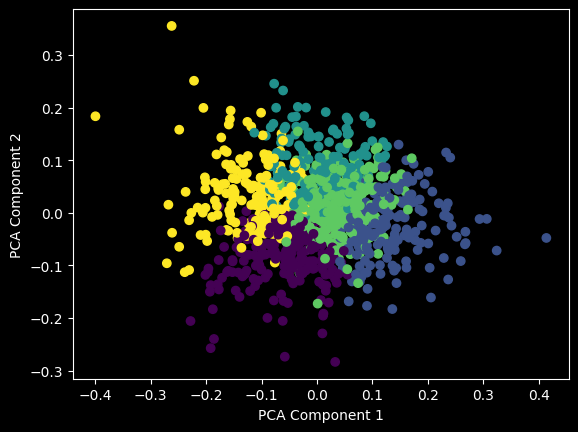

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert average_embeddings to a numpy array
average_embeddings_array = np.array(average_embeddings)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(average_embeddings_array)

# Use PCA to reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(average_embeddings_array)

# Create a scatter plot of the reduced embeddings, color coding the points by cluster
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans.labels_)

# Label the axes
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()
